# 8.4 Conceptual Exercises

## Question 1. Draw an example (of your own invention) of a partition of two dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your fgures, including the regions R1, R2,..., the cutpoints t1, t2,..., and so forth.

### Answer Question 1.

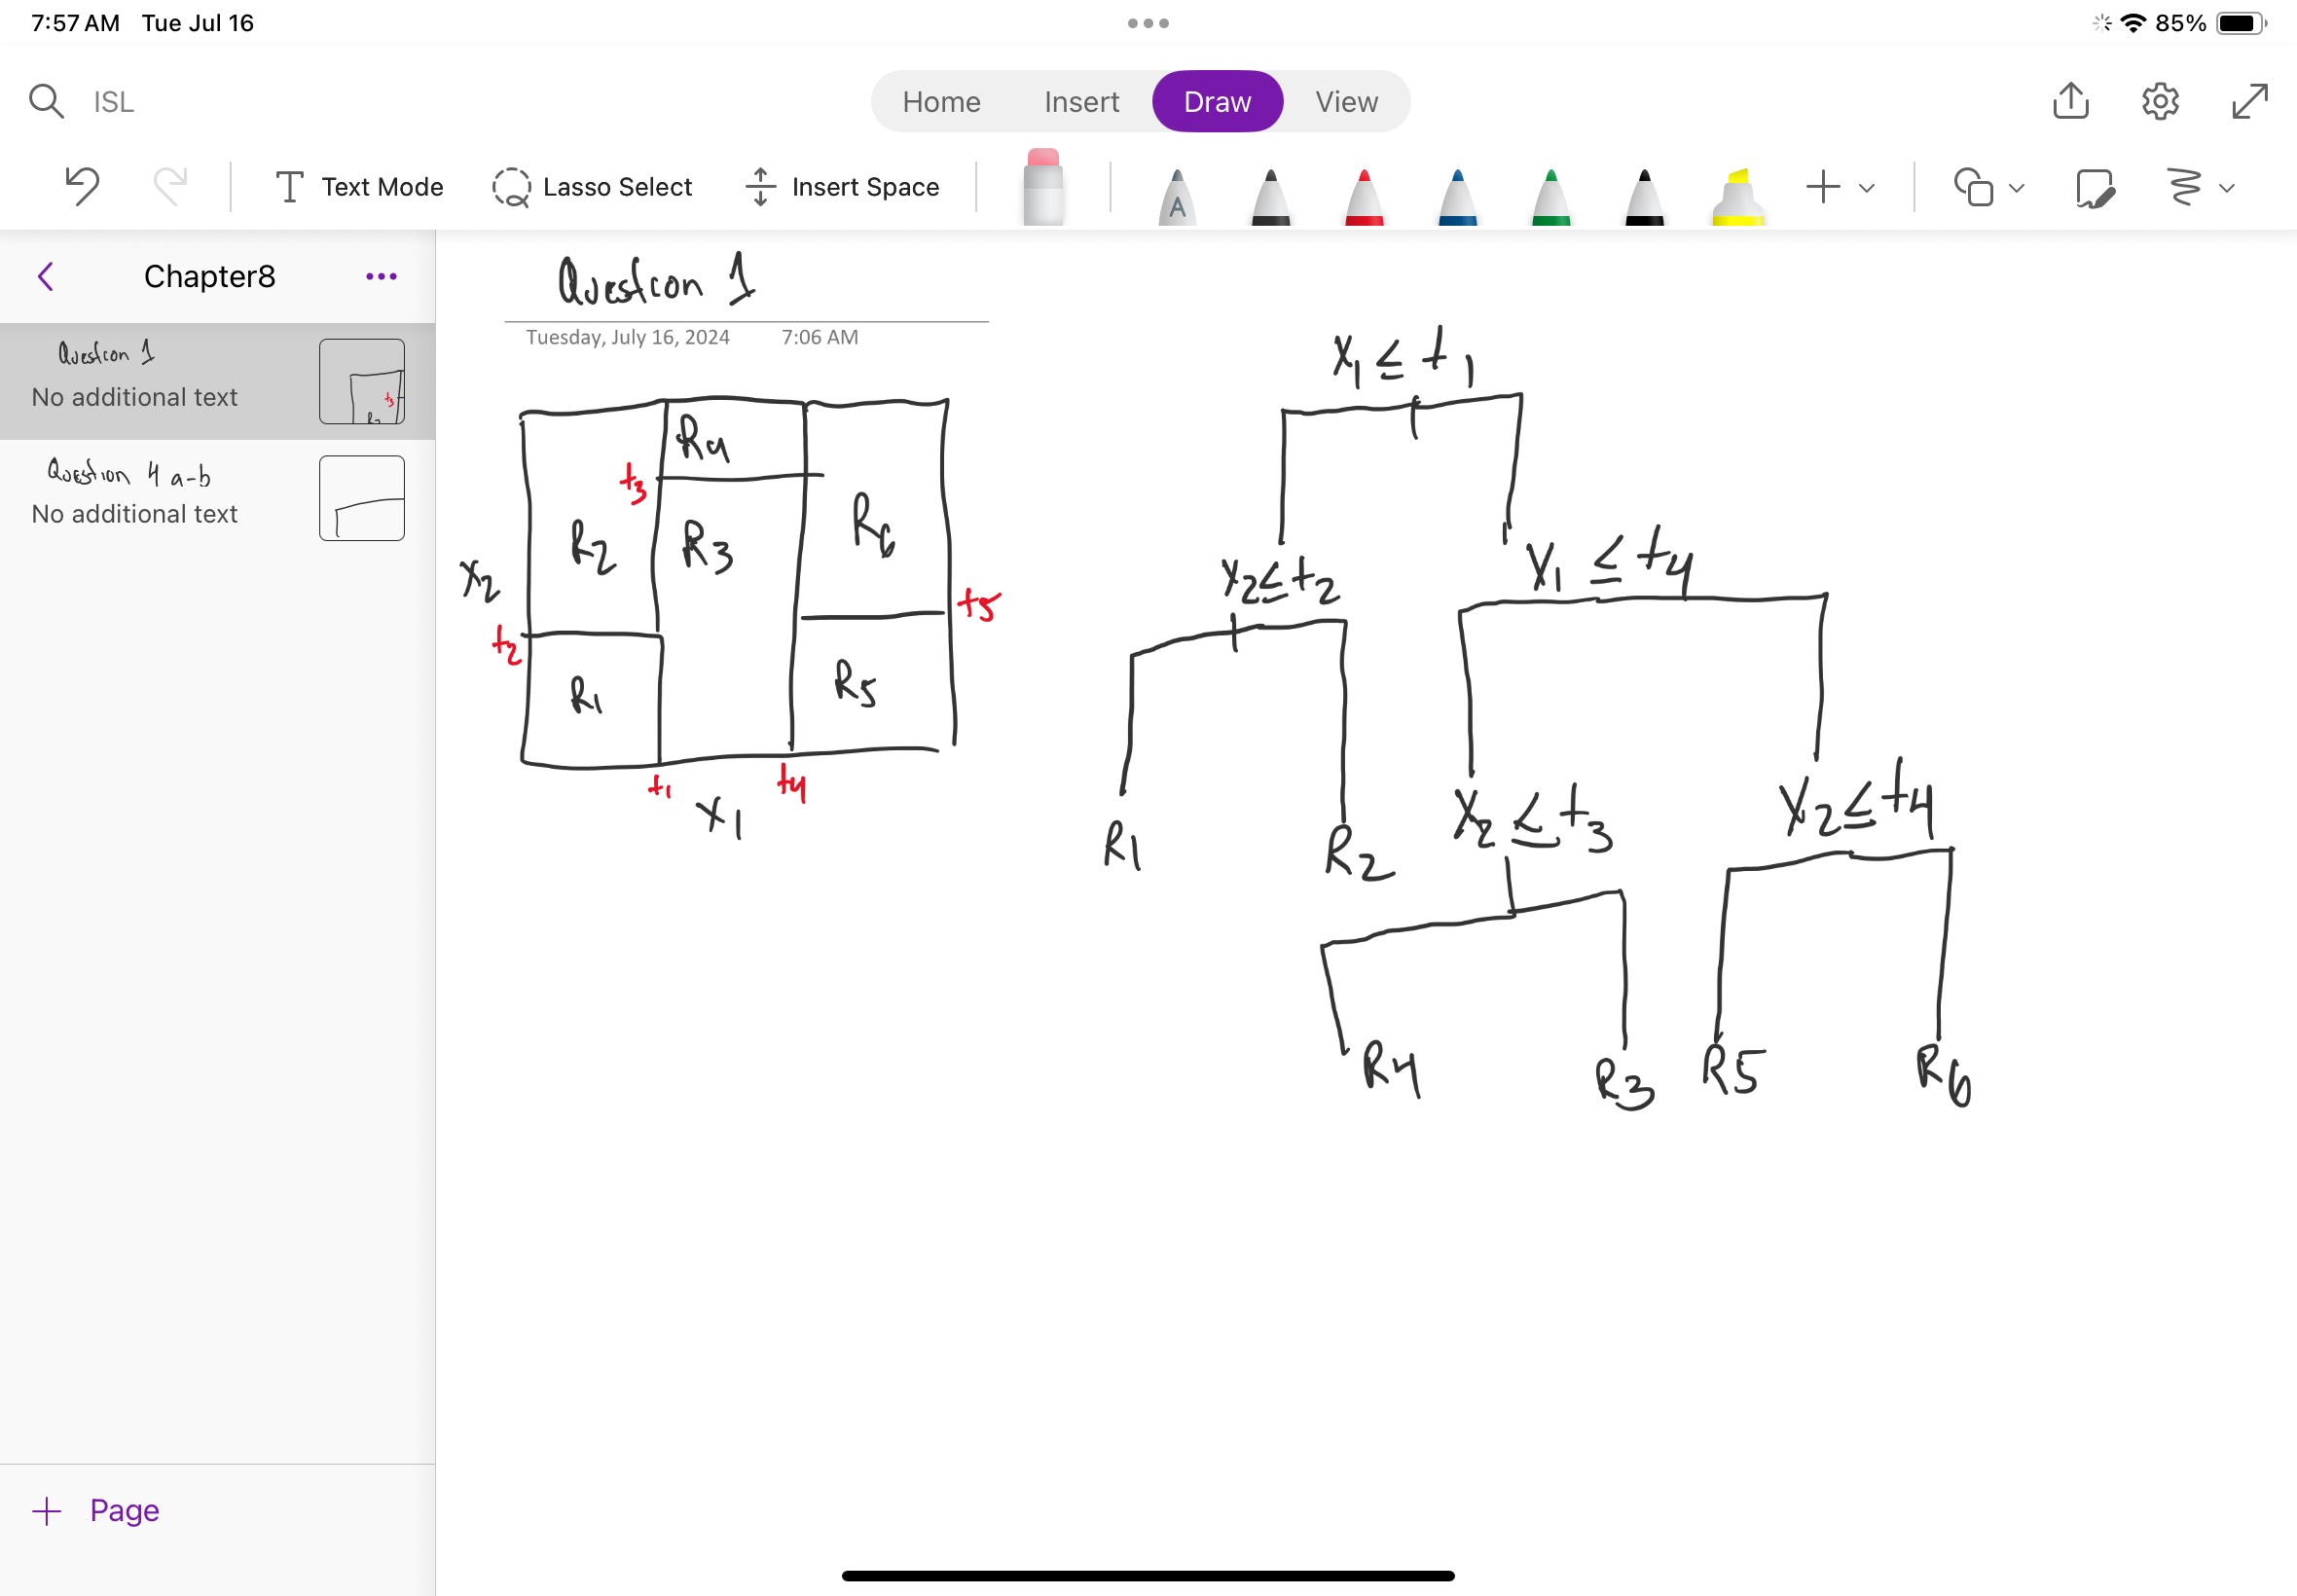

## Question 2. It is mentioned in Section 8.2.3 that boosting using depth-one trees (or stumps) leads to an additive model: that is, a model of the form $ f(X) = ∑_{j=1}^{p} f_{j} (X_{j}) $. Explain why this is the case. You can begin with (8.12) in Algorithm 8.2.

### Answer Question 2.

* When we look at Algorithm 8.2 we see that it goes from $b= 1 to B$. Each representing a different tree. However in this case we want to boost all the trees with one stump. This means our split d will equal 0, so the stump is just the predictor. Thus we will go through all the predictors which is 4j= 1 to p$.

* Secondly the tree can't be shrunked since it is as small as it possible can. It has no branches so we are adding each of the predictor functions without $λ$

## Question 3. Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $p_{m1}$. The x-axis should display $p_{m1̂}$, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classifcation error, and entropy.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def classification_error(p):
  return 1 - np.maximum(p, 1-p)

def gini_index(p):
  inverse = 1- p
  return (p * (1 - p)) + (inverse * (1 - inverse))

def entropy(p):
  inverse = 1- p
  return -(p *np.log2(p)) -(inverse *np.log2(inverse))



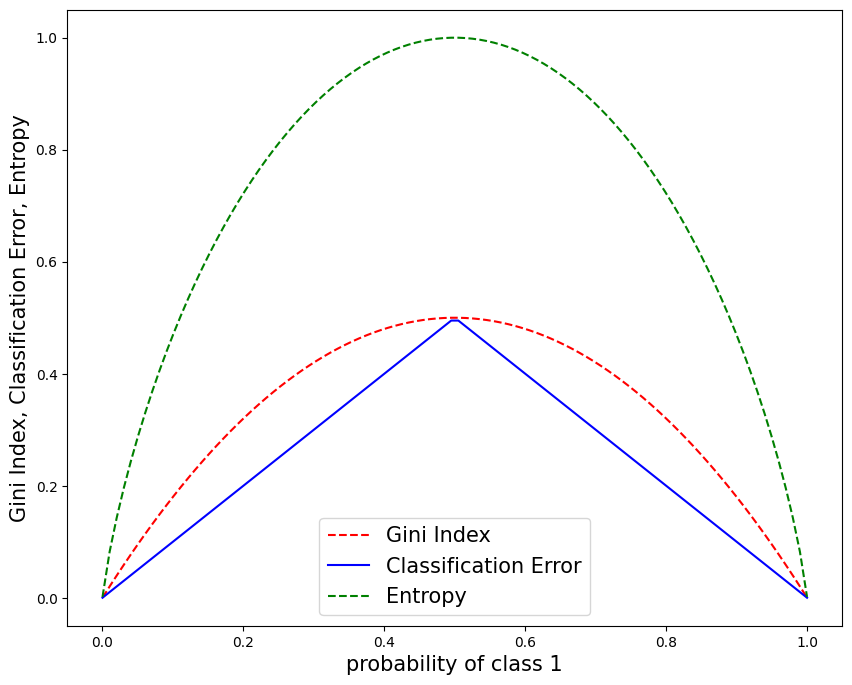

In [13]:
X = np.linspace(0.0001,.9999,100)
plt.figure(figsize = (10,8))
plt.plot(X, gini_index(X), label = 'Gini Index', linestyle = '--', color = 'red')
plt.plot(X, classification_error(X), label = 'Classification Error', linestyle = '-', color = 'blue')
plt.plot(X, entropy(X), label = 'Entropy', linestyle = '--', color = 'green')
plt.xlabel('probability of class 1', fontsize = 15)
plt.ylabel('Gini Index, Classification Error, Entropy', fontsize = 15)
plt.legend(fontsize = 15)
plt.title
plt.show();

### Answer Question 3.

* We can see the all the errors are the smallest when the probability of class is either 0 or 1 which is what we expected.

## Question 4. This question relates to the plots in Figure 8.14.

### (a) Sketch the tree corresponding to the partition of the predictor space illustrated in the left-hand panel of Figure 8.14. The numbers inside the boxes indicate the mean of Y within each region.

### (b) Create a diagram similar to the left-hand panel of Figure 8.14, using the tree illustrated in the right-hand panel of the same figure. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

### Answer 4. (a), (b)

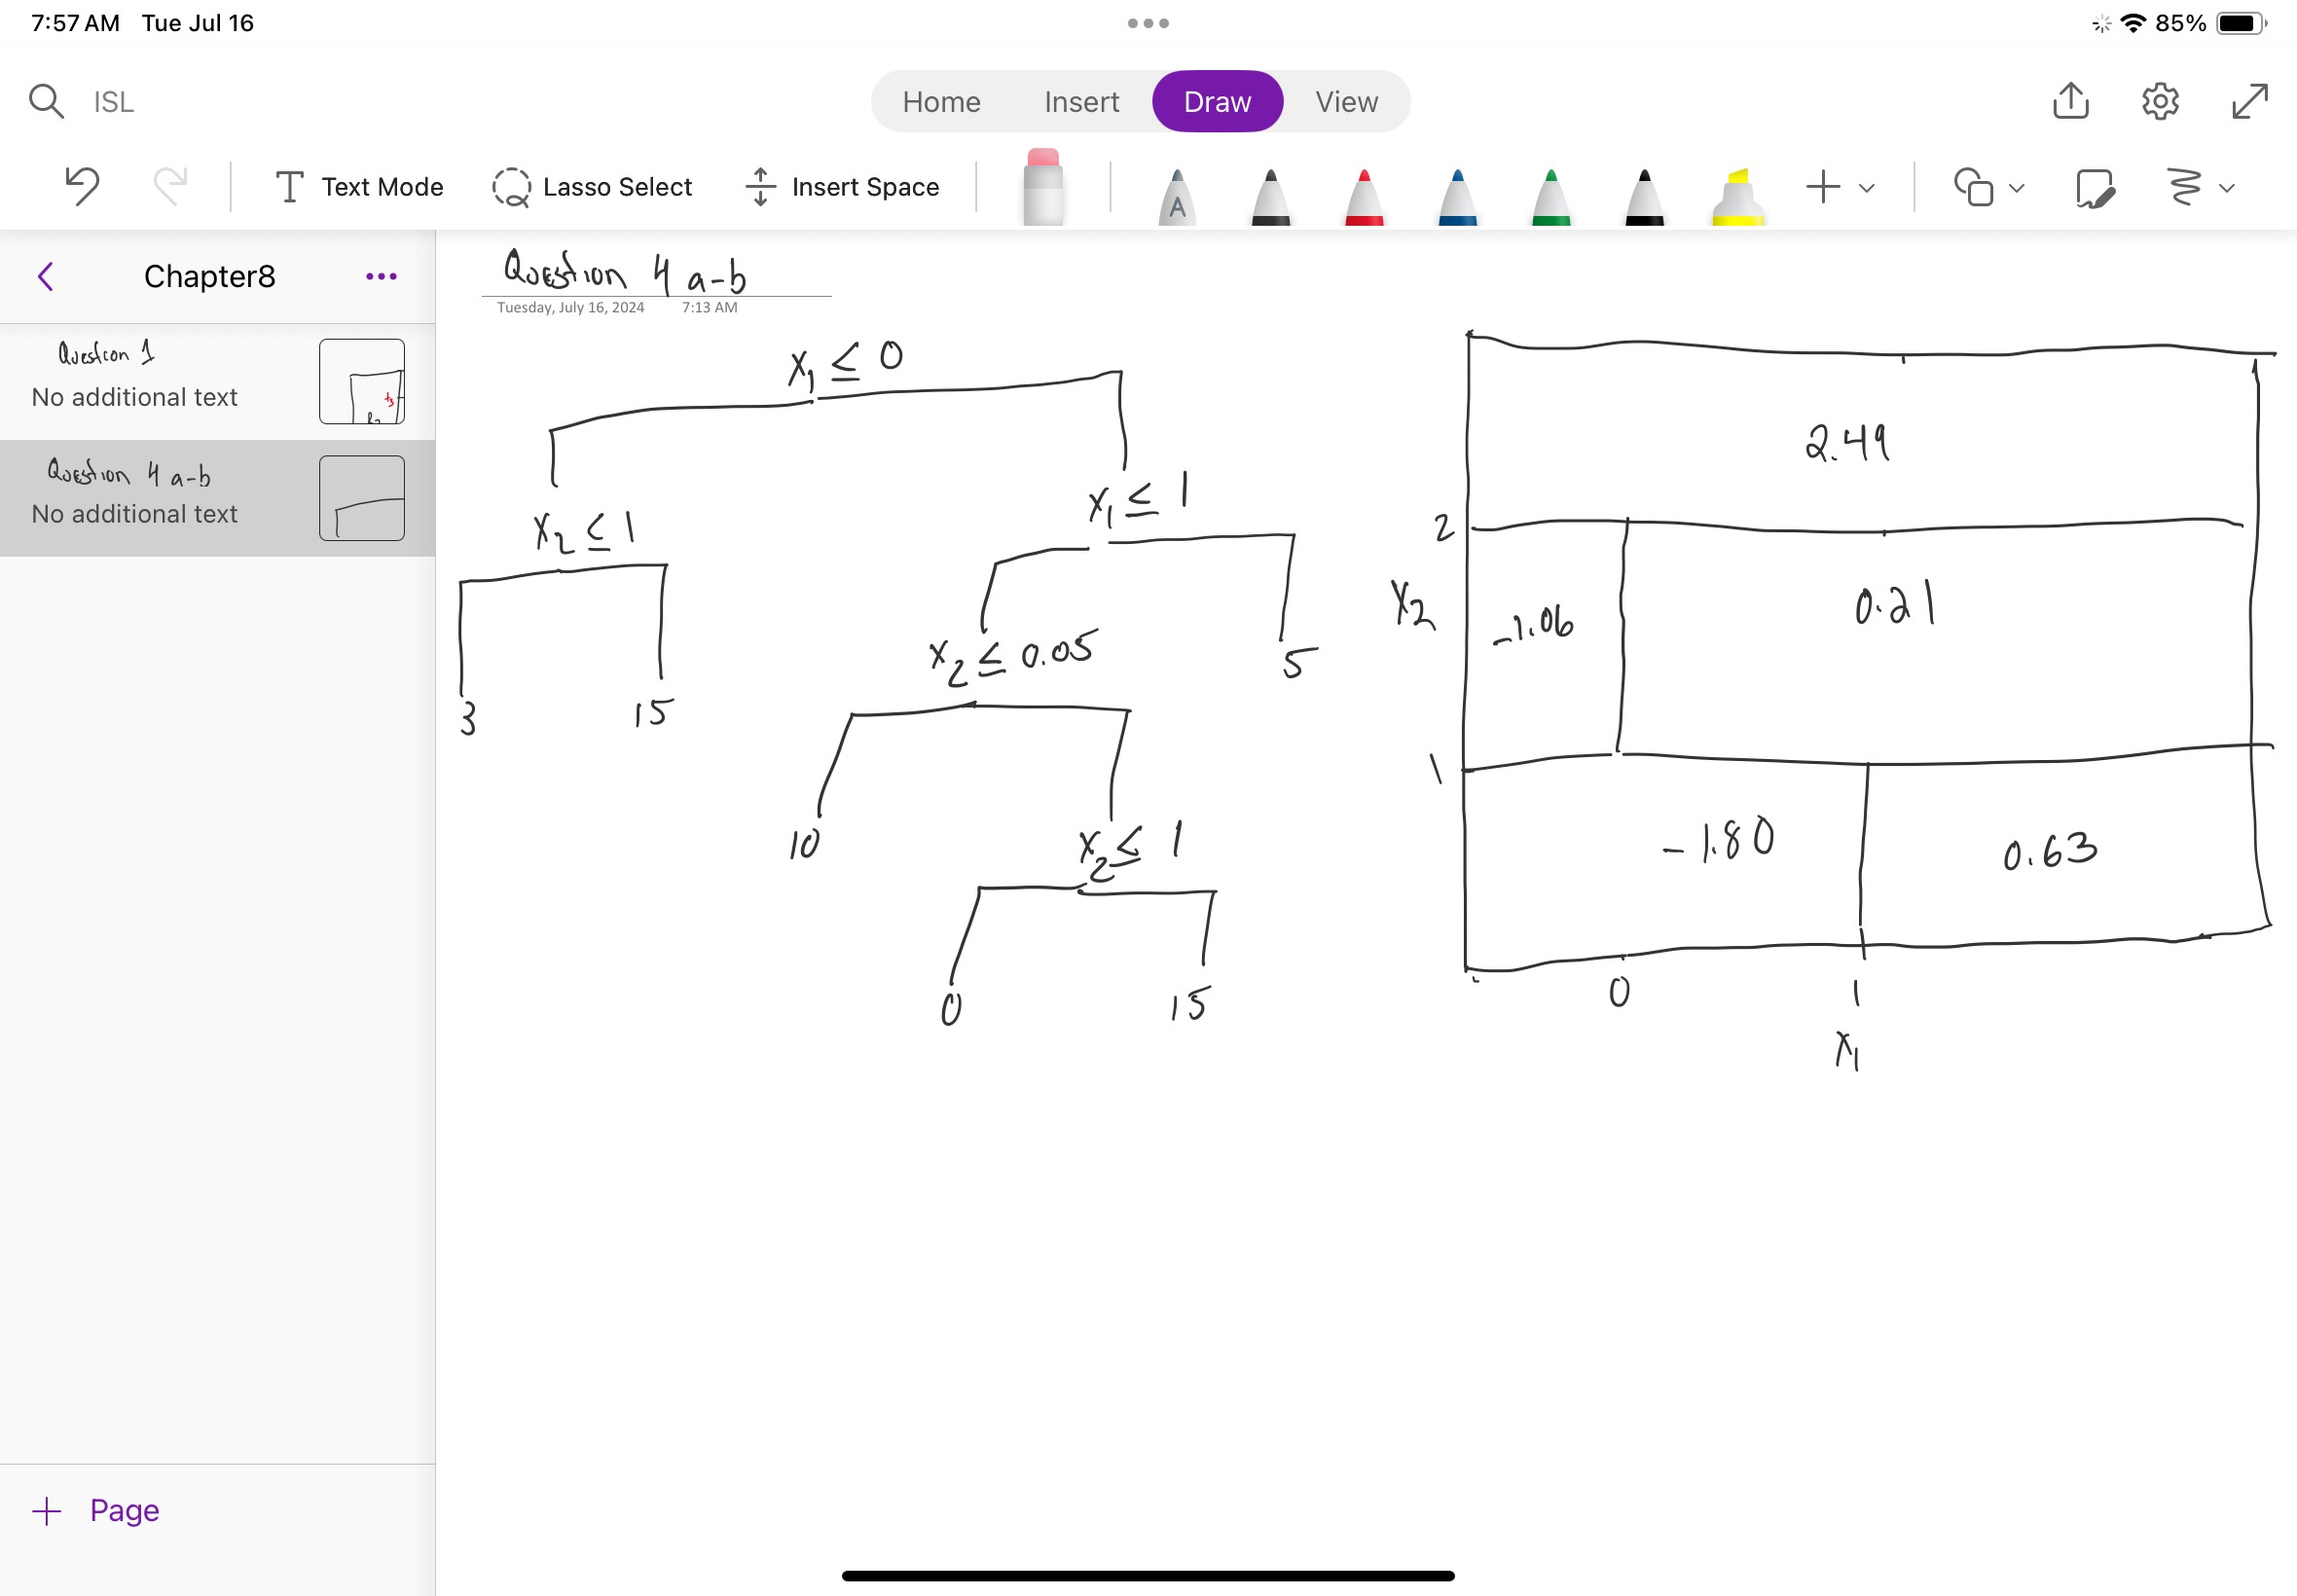

## Question 5 Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classifcation tree to each bootstrapped sample and, for a specifc value of X, produce 10 estimates of P(Class is Red|X) :

0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average
probability. In this example, what is the final classifcation under each of these two approaches?

### Answer Question 5.

* Approach 1 - Majority Vote: 6 of the 10 values of X are >0.5. Thus thre are 4 values for X <=0.5. So the majority vote is for RED.

* Approach 2 - Average Probability: We $\frac{1}{n}∑_{i=1}^{n} P(Red | X) = 0.45 $ so this means our answer is GREEN.

* It is odd how two different methods give two different answers.

## Question - 6. Provide a detailed explanation of the algorithm that is used to fit a regression tree.


### Answer Question 6.

1. First we look through all the predictors j with a cut s and see which combination of (j,s) will lead to the largest reduction in RSS. We pick this combo and call the region $R_{1}$. We will do this for p regions.

2. Now we have a full build, long tree. We will want to apply pruning to this tree so it doesn't overfit the training data. Thus we will need to select an $α$.

3. To find the optimal size $α$ we will apply k fold cross validation. Divide the data into K folds and rotate which of the folds is the test set and K -1 are the training set. Now repeat steps 1 and 2 on the above strategy to calculate an RSS. Put the results in a np.array([]) for each value of RSS for $α$. Then take the mean of each array of value $α$ and select the smallest RSS and its corresponding $α$.

4. Now recreate the subtree using step 1,2 with the $α$ selected from step 3.